In [2]:
import numpy as nm
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data1=pd.read_csv("/content/temp1.csv")
data2=pd.read_csv("/content/temp2.csv")
data1.head(5)
data2.head(5)

,days,temperature
0,11,80.3
1,12,98.3
2,13,55.0
3,14,22.3
4,15,101.3


In [4]:
data1.shape,data2.shape


((10, 2), (10, 2))

In [5]:
data1["class"]=1
data2["class"]=0

In [ ]:
man_test=data1.tail(5)
for i in range(9,4,-1):
  data1.drop([i],axis=0,inplace=True)
man_test1=data2.tail(5)
for i in range(9,4,-1):
  data2.drop([i],axis=0,inplace=True)



In [9]:
data_manual=pd.concat([man_test,man_test1],axis=0)
data_manual.to_csv("manual_testing.csv")

In [10]:
data_merge=pd.concat([data1,data2],axis=0)
data_merge.head(10)

,days,temperature,class
0,1,50.0,1
1,2,49.0,1
2,3,60.0,1
3,4,23.0,1
4,5,14.0,1
0,11,80.3,0
1,12,98.3,0
2,13,55.0,0
3,14,22.3,0
4,15,101.3,0


days
1     1
2     1
3     1
4     1
5     1
11    1
12    1
13    1
14    1
15    1
Name: temperature, dtype: int64


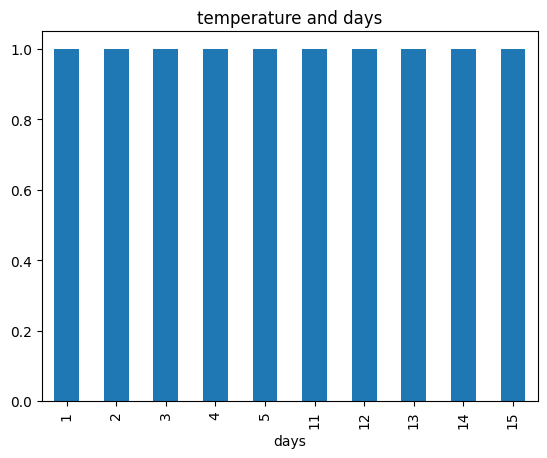

In [12]:
print(data_merge.groupby(['days'])['temperature'].count())
data_merge.groupby(['days'])['temperature'].count().plot(kind="bar")
plt.title("temperature and days")
plt.show()

class
0    5
1    5
Name: temperature, dtype: int64


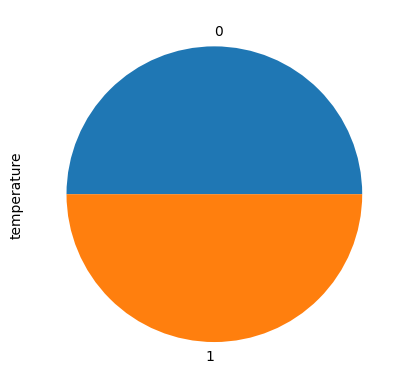

In [13]:
print(data_merge.groupby(['class'])['temperature'].count())
data_merge.groupby(['class'])['temperature'].count().plot(kind="pie")
plt.show()

In [15]:
x=data_merge["temperature"]
y=data_merge["class"]

In [29]:
from sklearn.model_selection import train_test_split as ttp
import re
import string

In [30]:
x_train,x_test,y_train,y_test=ttp(x,y,test_size=0.25,random_state=0)

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
vector = TfidfVectorizer()
x_train=x_train.astype(str)
x_test = x_test.astype(str)
xv_train=vector.fit_transform(x_train)
xv_test=vector.transform(x_test)

Accuracy is 0.33
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       0.00      0.00      0.00         2

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3

[[1 0]
 [2 0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

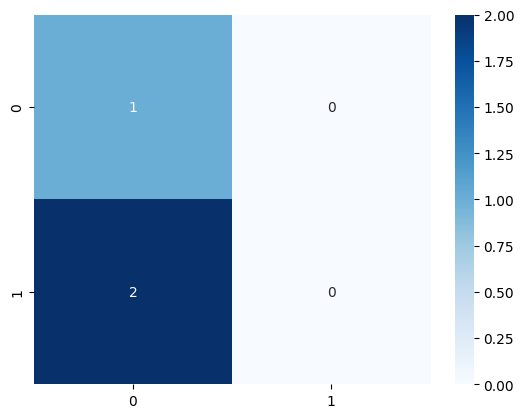

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
LR=LogisticRegression()
LR.fit(xv_train,y_train)
accuracy = LR.score(xv_test,y_test).round(2)
print("Accuracy is" , accuracy)
pred_LR= LR.predict(xv_test)
print(classification_report(y_test,pred_LR))
cm=confusion_matrix(y_test,pred_LR)
print(cm)
sns.heatmap(cm,cmap="Blues",annot=True)